In [5]:
from poloniex import Poloniex
polo = Poloniex()
import os, datetime
import plotly_express as px
import matplotlib as plt
import matplotlib.pyplot as plt

#input date time and Symbol
startdate = '1/11/2010'
end_date= '31/12/2018'
Symbol = 'USDT_BTC'



#pull HISTORICAL DATA
#86400 denotes daily
import pandas as pd
Daily_data =polo.returnChartData(Symbol, 86400, start= datetime.datetime.strptime(startdate, "%d/%m/%Y").timestamp(), end= datetime.datetime.strptime(end_date, "%d/%m/%Y").timestamp())
Daily_data = pd.DataFrame(Daily_data)
Daily_data['True Date']= pd.to_datetime(Daily_data['date'], unit='s')
Daily_data['Year']=  Daily_data['True Date'].dt.year
#moving average columns
Daily_data['MA10'] = Daily_data['close'].rolling(10).mean()
Daily_data['MA50'] = Daily_data['close'].rolling(50).mean()
Daily_data['EMA10'] = Daily_data['close'].ewm(span = 10).mean()
Daily_data['EMA50'] = Daily_data['close'].ewm(span = 50).mean()
#Rules
#Signal cross of 10 over 50 Buy at close price Logic 10>50 or short 10<50
#Always gong to be long or short
#Use closing prices
#Profit/Loss -- For buy (10>50) profit = close on day of cross until until 10<50 Reversal.
#Profit/Loss -- For Sell this is the reverse
#charts: Line chart, sma's and closing price
#profit LOSS calculator

Daily_data.head(1)

HTTPError: 403 Client Error: Forbidden for url: https://poloniex.com/public?currencyPair=USDT_BTC&period=86400&start=1288587600.0&end=1546236000.0&command=returnChartData

In [1]:
#activate the trade init variable
# it is set to true or false and should chnage as soon as a crossover happens and then will stay as TRUE
trade_init = 0

#Check the first value to see if we are ready to go long or short
#if fisrt value sma < price then set value to 1
#if first value is

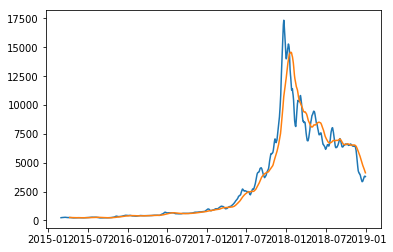

<Figure size 14400x7200 with 0 Axes>

In [4]:
#SMA system
%matplotlib inline
px.line(Daily_data, x='True Date', y='MA50')
px.line(Daily_data, x='True Date', y='MA10')
plt.plot(Daily_data['True Date'], Daily_data['MA10'])
plt.plot(Daily_data['True Date'], Daily_data['MA50'])
plt.figure(figsize=(200,100))
plt.show()


In [9]:
#create a column to hold crossover values
def buy_sell (row):
   if row['MA10'] > row['MA50'] :
      return 'LONG'
   if row['MA10'] < row['MA50'] :
      return 'SHORT'    
Daily_data['Long or Short Position'] = Daily_data.apply (lambda row: buy_sell(row), axis=1)
Daily_data

,close,date,high,low,open,quoteVolume,volume,weightedAverage,True Date,Year,MA10,MA50,EMA10,EMA50,Long or Short Position
0,244.000000,1424304000,244.000000,225.000000,225.000000,0.193117,4.627631e+01,239.627778,2015-02-19,2015,NaN,NaN,244.000000,244.000000,None
1,240.250000,1424390400,245.000000,240.250000,240.250118,0.230429,5.589490e+01,242.568479,2015-02-20,2015,NaN,NaN,241.937500,242.087500,None
2,245.000000,1424476800,245.000000,245.000000,245.000000,0.060091,1.472224e+01,245.000000,2015-02-21,2015,NaN,NaN,243.168605,243.097420,None
3,235.000000,1424563200,249.000000,235.000000,245.000000,0.539055,1.291212e+02,239.532608,2015-02-22,2015,NaN,NaN,240.477413,240.950017,None
4,235.000000,1424649600,235.001000,235.000000,235.000002,0.410926,9.656756e+01,235.000062,2015-02-23,2015,NaN,NaN,238.904997,239.662949,None
5,239.750000,1424736000,239.750000,235.000000,235.000000,0.626749,1.491544e+02,237.981177,2015-02-24,2015,NaN,NaN,239.124473,239.678946,None
6,237.750000,1424822400,239.750000,237.750000,239.750000,0.927550,2.215841e+02,238.891722,2015-02-25,2015,NaN,NaN,238.793281,239.369236,None
7,238.500000,1424908800,239.800000,237.750000,237.750000,0.000650,1.554879e-01,239.116563,2015-02-26,2015,NaN,NaN,238.726558,239.244775,None
8,249.000000,1424995200,249.000000,238.500000,238.500000,1.589037,3.837554e+02,241.501825,2015-02-27,2015,NaN,NaN,240.961699,240.510026,None
9,240.000060,1425081600,251.000000,240.000000,240.000000,0.071330,1.714734e+01,240.394041,2015-02-28,2015,240.425006,NaN,240.759701,240.449372,None
